## Overview

A real estate agent in Newyork is in charge of selling a new house but he doesnt know the price. I want to infer it by comparing it with other houses. I look at 79 explanatory variables describing (almost) every aspect of residential homes in the area. At the end of the day, what I want is a formula on all these features which gives me the price of the house, or at least an estimate for it. To help my client sell the new house.

**data Dictionary**
- **SalePrice** - the property's sale price in dollars. This is the target variable
- **MSSubClass:** The building class
- **MSZoning:** The general zoning classification
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access
- **Alley:** Type of alley access
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **LandSlope:** Slope of property
- **Neighborhood:** Physical locations within Ames city limits
- **Condition1:** Proximity to main road or railroad
- **Condition2:** Proximity to main road or railroad (if a second is present)
- **BldgType:** Type of dwelling
- **HouseStyle:** Style of dwelling
- **OverallQual:** Overall material and finish quality
- **OverallCond:** Overall condition rating
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date
- **RoofStyle:** Type of roof
- **RoofMatl:** Roof material
- **Exterior1st:** Exterior covering on house
- **Exterior2nd:** Exterior covering on house (if more than one material)
- **MasVnrType:** Masonry veneer type
- **MasVnrArea:** Masonry veneer area in square feet
- **ExterQual:** Exterior material quality
- **ExterCond:** Present condition of the material on the exterior
- **Foundation:** Type of foundation
- **BsmtQual:** Height of the basement
- **BsmtCond:** General condition of the basement
- **BsmtExposure:** Walkout or garden level basement walls
- **BsmtFinType1:** Quality of basement finished area
- **BsmtFinSF1:** Type 1 finished square feet
- **BsmtFinType2:** Quality of second finished area (if present)
- **BsmtFinSF2:** Type 2 finished square feet
- **BsmtUnfSF:** Unfinished square feet of basement area
- **TotalBsmtSF:** Total square feet of basement area
- **Heating:** Type of heating
- **HeatingQC:** Heating quality and condition
- **CentralAir:** Central air conditioning
- **Electrical:** Electrical system
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **LowQualFinSF:** Low quality finished square feet (all floors)
- **GrLivArea:** Above grade (ground) living area square feet
- **BsmtFullBath:** Basement full bathrooms
- **BsmtHalfBath:** Basement half bathrooms
- **FullBath:** Full bathrooms above grade
- **HalfBath:** Half baths above grade
- **Bedroom:** Number of bedrooms above basement level
- **Kitchen:** Number of kitchens
- **KitchenQual:** Kitchen quality
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
- **Functional:** Home functionality rating
- **Fireplaces:** Number of fireplaces
- **FireplaceQu:** Fireplace quality
- **GarageType:** Garage location
- **GarageYrBlt:** Year garage was built
- **GarageFinish:** Interior finish of the garage
- **GarageCars:** Size of garage in car capacity
- **GarageArea:** Size of garage in square feet
- **GarageQual:** Garage quality
- **GarageCond:** Garage condition
- **PavedDrive:** Paved driveway
- **WoodDeckSF:** Wood deck area in square feet
- **OpenPorchSF:** Open porch area in square feet
- **EnclosedPorch:** Enclosed porch area in square feet
- **3SsnPorch:** Three season porch area in square feet
- **ScreenPorch:** Screen porch area in square feet
- **PoolArea:** Pool area in square feet
- **PoolQC:** Pool quality
- **Fence:** Fence quality
- **MiscFeature:** Miscellaneous feature not covered in other categories
- **MiscVal:** $ Value of miscellaneous feature
- **MoSold:** Month Sold
- **YrSold:** Year Sold
- **SaleType:** Type of sale
- **SaleCondition:** Condition of sale

## Importing necessary libraries

In [1]:
# to make my Python code more structured automatically (good coding practice)
%load_ext nb_black

# Data Analytics Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder  # LabelEncoder #OneHotEncoder
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
from math import ceil

# to show all the columns in the dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 85)

# Update some default parameters for plotting throughout the notebook
plt.rcParams.update(
    {
        "font.size": 12,
        "xtick.labelsize": 15,
        "ytick.labelsize": 15,
        "axes.labelsize": 15,
        "axes.titlesize": 20,
    }
)

<IPython.core.display.Javascript object>

## Loading data and exploration

In [2]:
train_data = pd.read_csv("train.csv", index_col="Id")
test_data = pd.read_csv("test.csv", index_col="Id")

<IPython.core.display.Javascript object>

In [3]:
# making a copy of the train and test data to preserve the original data
data_train = train_data.copy()
data_test = test_data.copy()

<IPython.core.display.Javascript object>

In [4]:
# Remove rows with missing target
data_train = data_train.dropna(axis=0, subset=["SalePrice"])

<IPython.core.display.Javascript object>

In [5]:
data = data_train.drop("SalePrice", axis=1)
y = data_train["SalePrice"]

<IPython.core.display.Javascript object>

### Data Overview


In [6]:
# Checking the first 5 rows of the data
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

<IPython.core.display.Javascript object>

In [7]:
# Checking the last 5 rows of the data
data.tail()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1456         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1457         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1459         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1460         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1456       Norm     1Fam     2Story            6            5       1999   
1457       Norm     1Fam     1Story            6            6       1978   
1458       Norm     1Fam     2Story            7            9       1941   
1459       Norm     1Fam     1Story            5            6       1950   
1460       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1456          2000     Gable  CompShg     VinylSd     VinylSd       None   
1457          1988     Gable  CompShg     Plywood     Plywood      Stone   
1458          2006     Gable  CompShg     CemntBd     CmentBd       None   
1459          1996       Hip  CompShg     MetalSd     MetalSd       None   
1460          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1456         0.0        TA        TA      PConc       Gd       TA   
1457       119.0        TA        TA     CBlock       Gd       TA   
1458         0.0        Ex        Gd      Stone       TA       Gd   
1459         0.0        TA        TA     CBlock       TA       TA   
1460         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1456           No          Unf           0          Unf           0   
1457           No          ALQ         790          Rec         163   
1458           No          GLQ         275          Unf           0   
1459           Mn          GLQ          49          Rec        1029   
1460           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1456        953          953    GasA        Ex          Y      SBrkr   
1457        589         1542    GasA        TA          Y      SBrkr   
1458        877         1152    GasA        Ex          Y      SBrkr   
1459          0         1078    GasA        Gd          Y      FuseA   
1460        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1456       953       694             0       1647             0             0   
1457      2073         0             0       2073             1             0   
1458      1188      1152             0       2340             0             0   
1459      1078   

<IPython.core.display.Javascript object>

In [8]:
# let's view a sample of the data randomly
data.sample(n=10, random_state=1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
259           60       RL         80.0    12435   Pave   NaN      Reg   
268           75       RL         60.0     8400   Pave   NaN      Reg   
289           20       RL          NaN     9819   Pave   NaN      IR1   
650          180       RM         21.0     1936   Pave   NaN      Reg   
1234          20       RL          NaN    12160   Pave   NaN      IR1   
168           60       RL         86.0    10562   Pave   NaN      Reg   
927           60       RL         93.0    11999   Pave   NaN      Reg   
832          160       FV         30.0     3180   Pave  Pave      Reg   
1238          60       RL         41.0    12393   Pave   NaN      IR2   
427           80       RL          NaN    12800   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
259          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
268          Bnk    AllPub    Inside       Mod        SWISU       Norm   
289          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
650          Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1234         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
168          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
927          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
832          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1238         Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
427          Low    AllPub    Inside       Mod      SawyerW       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
259        Norm     1Fam     2Story            7            5       2001   
268        Norm     1Fam     2.5Fin            5            8       1939   
289        Norm     1Fam     1Story            5            5       1967   
650        Norm    Twnhs     SFoyer            4            6       1970   
1234       Norm     1Fam     1Story            5            5       1959   
168        Norm     1Fam     2Story            8            5       2007   
927        Norm     1Fam     2Story            8            5       2003   
832        Norm   TwnhsE     2Story            7            5       2005   
1238       Norm     1Fam     2Story            7            5       2004   
427        Norm     1Fam       SLvl            7            5       1989   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
259           2001     Gable  CompShg     VinylSd     VinylSd    BrkFace   
268           1997     Gable  CompShg     Wd Sdng     Wd Sdng       None   
289           1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
650           1970     Gable  CompShg     CemntBd     CmentBd       None   
1234          1959       Hip  CompShg     Plywood     Plywood    BrkFace   
168           2007     Gable  CompShg     VinylSd     VinylSd      Stone   
927           2004       Hip  CompShg     VinylSd     VinylSd    BrkFace   
832           2005     Gable  CompShg     MetalSd     MetalSd       None   
1238          2005     Gable  CompShg     VinylSd     VinylSd       None   
427           1989     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
259        172.0        Gd        TA      PConc       Gd       TA   
268          0.0        TA        TA      PConc       TA       TA   
289         31.0        TA        Gd     CBlock       TA       TA   
650          0.0        TA        TA     CBlock       Gd       TA   


<IPython.core.display.Javascript object>

- It seems the data has a lot of missing values Which I will handle later

In [9]:
# Checking Shape of data
print(f"The training data has {data.shape[0]} rows and {data.shape[1]} columns")
print(f"The test data has {data_test.shape[0]} rows and {data_test.shape[1]} columns")

The training data has 1460 rows and 79 columns
The test data has 1459 rows and 79 columns


<IPython.core.display.Javascript object>

- Some Columns have lots of missing values

In [10]:
# checking for duplicate rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate rows in the train data

In [11]:
# checking for duplicate rows in test data
test_data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate rows in the test data

In [12]:
# Checking number the unique values, datatype and missing values
info = pd.DataFrame(data.dtypes, columns=["Dtype"])
info["Unique"] = data.nunique().values
info["Null"] = data.isnull().sum().values
info

Dtype  Unique  Null
MSSubClass       int64      15     0
MSZoning        object       5     0
LotFrontage    float64     110   259
LotArea          int64    1073     0
Street          object       2     0
Alley           object       2  1369
LotShape        object       4     0
LandContour     object       4     0
Utilities       object       2     0
LotConfig       object       5     0
LandSlope       object       3     0
Neighborhood    object      25     0
Condition1      object       9     0
Condition2      object       8     0
BldgType        object       5     0
HouseStyle      object       8     0
OverallQual      int64      10     0
OverallCond      int64       9     0
YearBuilt        int64     112     0
YearRemodAdd     int64      61     0
RoofStyle       object       6     0
RoofMatl        object       8     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
MasVnrType      object       4     8
MasVnrArea     float64     327     8
ExterQual       object       4     0
ExterCond       object       5     0
Foundation      object       6     0
BsmtQual        object       4    37
BsmtCond        object       4    37
BsmtExposure    object       4    38
BsmtFinType1    object       6    37
BsmtFinSF1       int64     637     0
BsmtFinType2    object       6    38
BsmtFinSF2       int64     144     0
BsmtUnfSF        int64     780     0
TotalBsmtSF      int64     721     0
Heating         object       6     0
HeatingQC       object       5     0
CentralAir      object       2     0
Electrical      object       5     1
1stFlrSF         int64     753     0
2ndFlrSF         int64     417     0
LowQualFinSF     int64      24     0
GrLivArea        int64     861     0
BsmtFullBath     int64       4     0
BsmtHalfBath     int64       3     0
FullBath         int64       4     0
HalfBath         int64       3     0
BedroomAbvGr     int64       8     0
KitchenAbvGr     int64       4     0
KitchenQual     object       4     0
TotRmsAbvGrd     int64      12     0
Functional      object       7     0
Fireplaces       int64       4     0
FireplaceQu     object       5   690
GarageType      object       6    81
GarageYrBlt    float64      97    81
GarageFinish    object       3    81
GarageCars       int64       5     0
GarageArea       int64     441     0
GarageQual      object       5    81
GarageCond      object       5    81
PavedDrive      object       3     0
WoodDeckSF       int64     274     0
OpenPorchSF      int64     202     0
EnclosedPorch    int64     120     0
3SsnPorch        int64      20     0
ScreenPorch      int64      76     0
PoolArea         int64       8     0
PoolQC          object       3  1453
Fence           object       4  1179
MiscFeature     object       4  1406
MiscVal          int64      21     0
MoSold           int64      12     0
YrSold           int64       5     0
SaleType        object       9     0
SaleCondition   object       6     0

<IPython.core.display.Javascript object>

In [13]:
# Cheking the counts of the different datatypes
data.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# Checking the data statistics of numerical data
data.describe().T

count          mean          std     min      25%     50%  \
MSSubClass     1460.0     56.897260    42.300571    20.0    20.00    50.0   
LotFrontage    1201.0     70.049958    24.284752    21.0    59.00    69.0   
LotArea        1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
OverallQual    1460.0      6.099315     1.382997     1.0     5.00     6.0   
OverallCond    1460.0      5.575342     1.112799     1.0     5.00     5.0   
YearBuilt      1460.0   1971.267808    30.202904  1872.0  1954.00  1973.0   
YearRemodAdd   1460.0   1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea     1452.0    103.685262   181.066207     0.0     0.00     0.0   
BsmtFinSF1     1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2     1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtUnfSF      1460.0    567.240411   441.866955     0.0   223.00   477.5   
TotalBsmtSF    1460.0   1057.429452   438.705324     0.0   795.75   991.5   
1stFlrSF       1460.0   1162.626712   386.587738   334.0   882.00  1087.0   
2ndFlrSF       1460.0    346.992466   436.528436     0.0     0.00     0.0   
LowQualFinSF   1460.0      5.844521    48.623081     0.0     0.00     0.0   
GrLivArea      1460.0   1515.463699   525.480383   334.0  1129.50  1464.0   
BsmtFullBath   1460.0      0.425342     0.518911     0.0     0.00     0.0   
BsmtHalfBath   1460.0      0.057534     0.238753     0.0     0.00     0.0   
FullBath       1460.0      1.565068     0.550916     0.0     1.00     2.0   
HalfBath       1460.0      0.382877     0.502885     0.0     0.00     0.0   
BedroomAbvGr   1460.0      2.866438     0.815778     0.0     2.00     3.0   
KitchenAbvGr   1460.0      1.046575     0.220338     0.0     1.00     1.0   
TotRmsAbvGrd   1460.0      6.517808     1.625393     2.0     5.00     6.0   
Fireplaces     1460.0      0.613014     0.644666     0.0     0.00     1.0   
GarageYrBlt    1379.0   1978.506164    24.689725  1900.0  1961.00  1980.0   
GarageCars     1460.0      1.767123     0.747315     0.0     1.00     2.0   
GarageArea     1460.0    472.980137   213.804841     0.0   334.50   480.0   
WoodDeckSF     1460.0     94.244521   125.338794     0.0     0.00     0.0   
OpenPorchSF    1460.0     46.660274    66.256028     0.0     0.00    25.0   
EnclosedPorch  1460.0     21.954110    61.119149     0.0     0.00     0.0   
3SsnPorch      1460.0      3.409589    29.317331     0.0     0.00     0.0   
ScreenPorch    1460.0     15.060959    55.757415     0.0     0.00     0.0   
PoolArea       1460.0      2.758904    40.177307     0.0     0.00     0.0   
MiscVal        1460.0     43.489041   496.123024     0.0     0.00     0.0   
MoSold         1460.0      6.321918     2.703626     1.0     5.00     6.0   
YrSold         1460.0   2007.815753     1.328095  2006.0  2007.00  2008.0   

                    75%       max  
MSSubClass        70.00     190.0  
LotFrontage       80.00     313.0  
LotArea        11601.50  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2000.00    2010.0  
YearRemodAdd    2004.00    2010.0  
MasVnrArea       166.00    1600.0  
BsmtFinSF1       712.25    5644.0  
BsmtFinSF2         0.00    1474.0  
BsmtUnfSF        808.00    2336.0  
TotalBsmtSF     1298.25    6110.0  
1stFlrSF        1391.25    4692.0  
2ndFlrSF         728.00    2065.0  
LowQualFinSF       0.00     572.0  
GrLivArea       1776.75    5642.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       8.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      14.0  
Fireplaces         1.00       3.0  
GarageYrBlt     2002.00    2010.0  
GarageCars         2.00       4.0  
GarageArea       576.00    1418.0  
WoodDeckSF       168.00     857.0  
OpenPorchSF       68.00     547.0  
EnclosedPorch      0.00     552.0  
3SsnPorch          0.00     508.0  
ScreenPorch   

<IPython.core.display.Javascript object>

In [15]:
# Checking the data statistics of categorical data
data.describe(include="object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

<IPython.core.display.Javascript object>

In [16]:
data["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

<IPython.core.display.Javascript object>

In [17]:
# exploring the unique values of categorical variables
cat_column = data.select_dtypes(include=["object", "category"]).columns.tolist()
for i in cat_column:
    print(f"the unique values in {i} columns are:")
    print(data[i].unique())
    print(70 * "-")
    print("")

the unique values in MSZoning columns are:
['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------------------------------------

the unique values in Street columns are:
['Pave' 'Grvl']
----------------------------------------------------------------------

the unique values in Alley columns are:
[nan 'Grvl' 'Pave']
----------------------------------------------------------------------

the unique values in LotShape columns are:
['Reg' 'IR1' 'IR2' 'IR3']
----------------------------------------------------------------------

the unique values in LandContour columns are:
['Lvl' 'Bnk' 'Low' 'HLS']
----------------------------------------------------------------------

the unique values in Utilities columns are:
['AllPub' 'NoSeWa']
----------------------------------------------------------------------

the unique values in LotConfig columns are:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
----------------------------------------------------------------------

the unique va

<IPython.core.display.Javascript object>

### Removing the columns with more than half missing values

In [18]:
# Making function so that we can reuse it in later stages as well
def show_null_values(X, X_test):
    # Missing values in each column of Training and Testing data
    null_values_train = X.isnull().sum()
    null_values_test = X_test.isnull().sum()

    # Making DataFrame for combining training and testing missing values
    null_values = pd.DataFrame(null_values_train)
    null_values["Test Data"] = null_values_test.values
    null_values.rename(columns={0: "Train Data"}, inplace=True)

    # Showing only columns having missing values and sorting them
    null_values = null_values.loc[
        (null_values["Train Data"] != 0) | (null_values["Test Data"] != 0)
    ]
    null_values = null_values.sort_values(
        by=["Train Data", "Test Data"], ascending=False
    )

    print("Total miising values:", null_values.sum(), sep="\n")

    return null_values

<IPython.core.display.Javascript object>

In [19]:
show_null_values(data, data_test)

Total miising values:
Train Data    6965
Test Data     7000
dtype: int64


Train Data  Test Data
PoolQC              1453       1456
MiscFeature         1406       1408
Alley               1369       1352
Fence               1179       1169
FireplaceQu          690        730
LotFrontage          259        227
GarageYrBlt           81         78
GarageFinish          81         78
GarageQual            81         78
GarageCond            81         78
GarageType            81         76
BsmtExposure          38         44
BsmtFinType2          38         42
BsmtCond              37         45
BsmtQual              37         44
BsmtFinType1          37         42
MasVnrType             8         16
MasVnrArea             8         15
Electrical             1          0
MSZoning               0          4
Utilities              0          2
BsmtFullBath           0          2
BsmtHalfBath           0          2
Functional             0          2
Exterior1st            0          1
Exterior2nd            0          1
BsmtFinSF1             0          1
BsmtFinSF2             0          1
BsmtUnfSF              0          1
TotalBsmtSF            0          1
KitchenQual            0          1
GarageCars             0          1
GarageArea             0          1
SaleType               0          1

<IPython.core.display.Javascript object>

In [20]:
# extracting Columns where missing values in greater than half number of rows
null_cols = [col for col in data.columns if data[col].isnull().sum() > len(data) / 2]
null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

<IPython.core.display.Javascript object>

In [21]:
# the "FireplaceQu" columns seems to have a lot of missing values. so will be added to the columns to the dropped
null_col = null_cols.copy()
null_col.insert(2, "FireplaceQu")
null_col

['Alley', 'PoolQC', 'FireplaceQu', 'Fence', 'MiscFeature']

<IPython.core.display.Javascript object>

In [22]:
# Dropping the columns
data.drop(null_col, axis=1, inplace=True)
test_data.drop(null_col, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [23]:
# Total missing values after removing columns with more than half missing values
print("Total missing values:")
print("Training data\t", data.isnull().sum().sum())
print("Testing data\t", test_data.isnull().sum().sum())

Total missing values:
Training data	 868
Testing data	 885


<IPython.core.display.Javascript object>

## Dropping columns with most of the rows having only one category

### Visualizing Categorical Data

In [24]:
# checking the number of categorical columns
object_cols = data.select_dtypes("object").columns
len(object_cols)

38

<IPython.core.display.Javascript object>

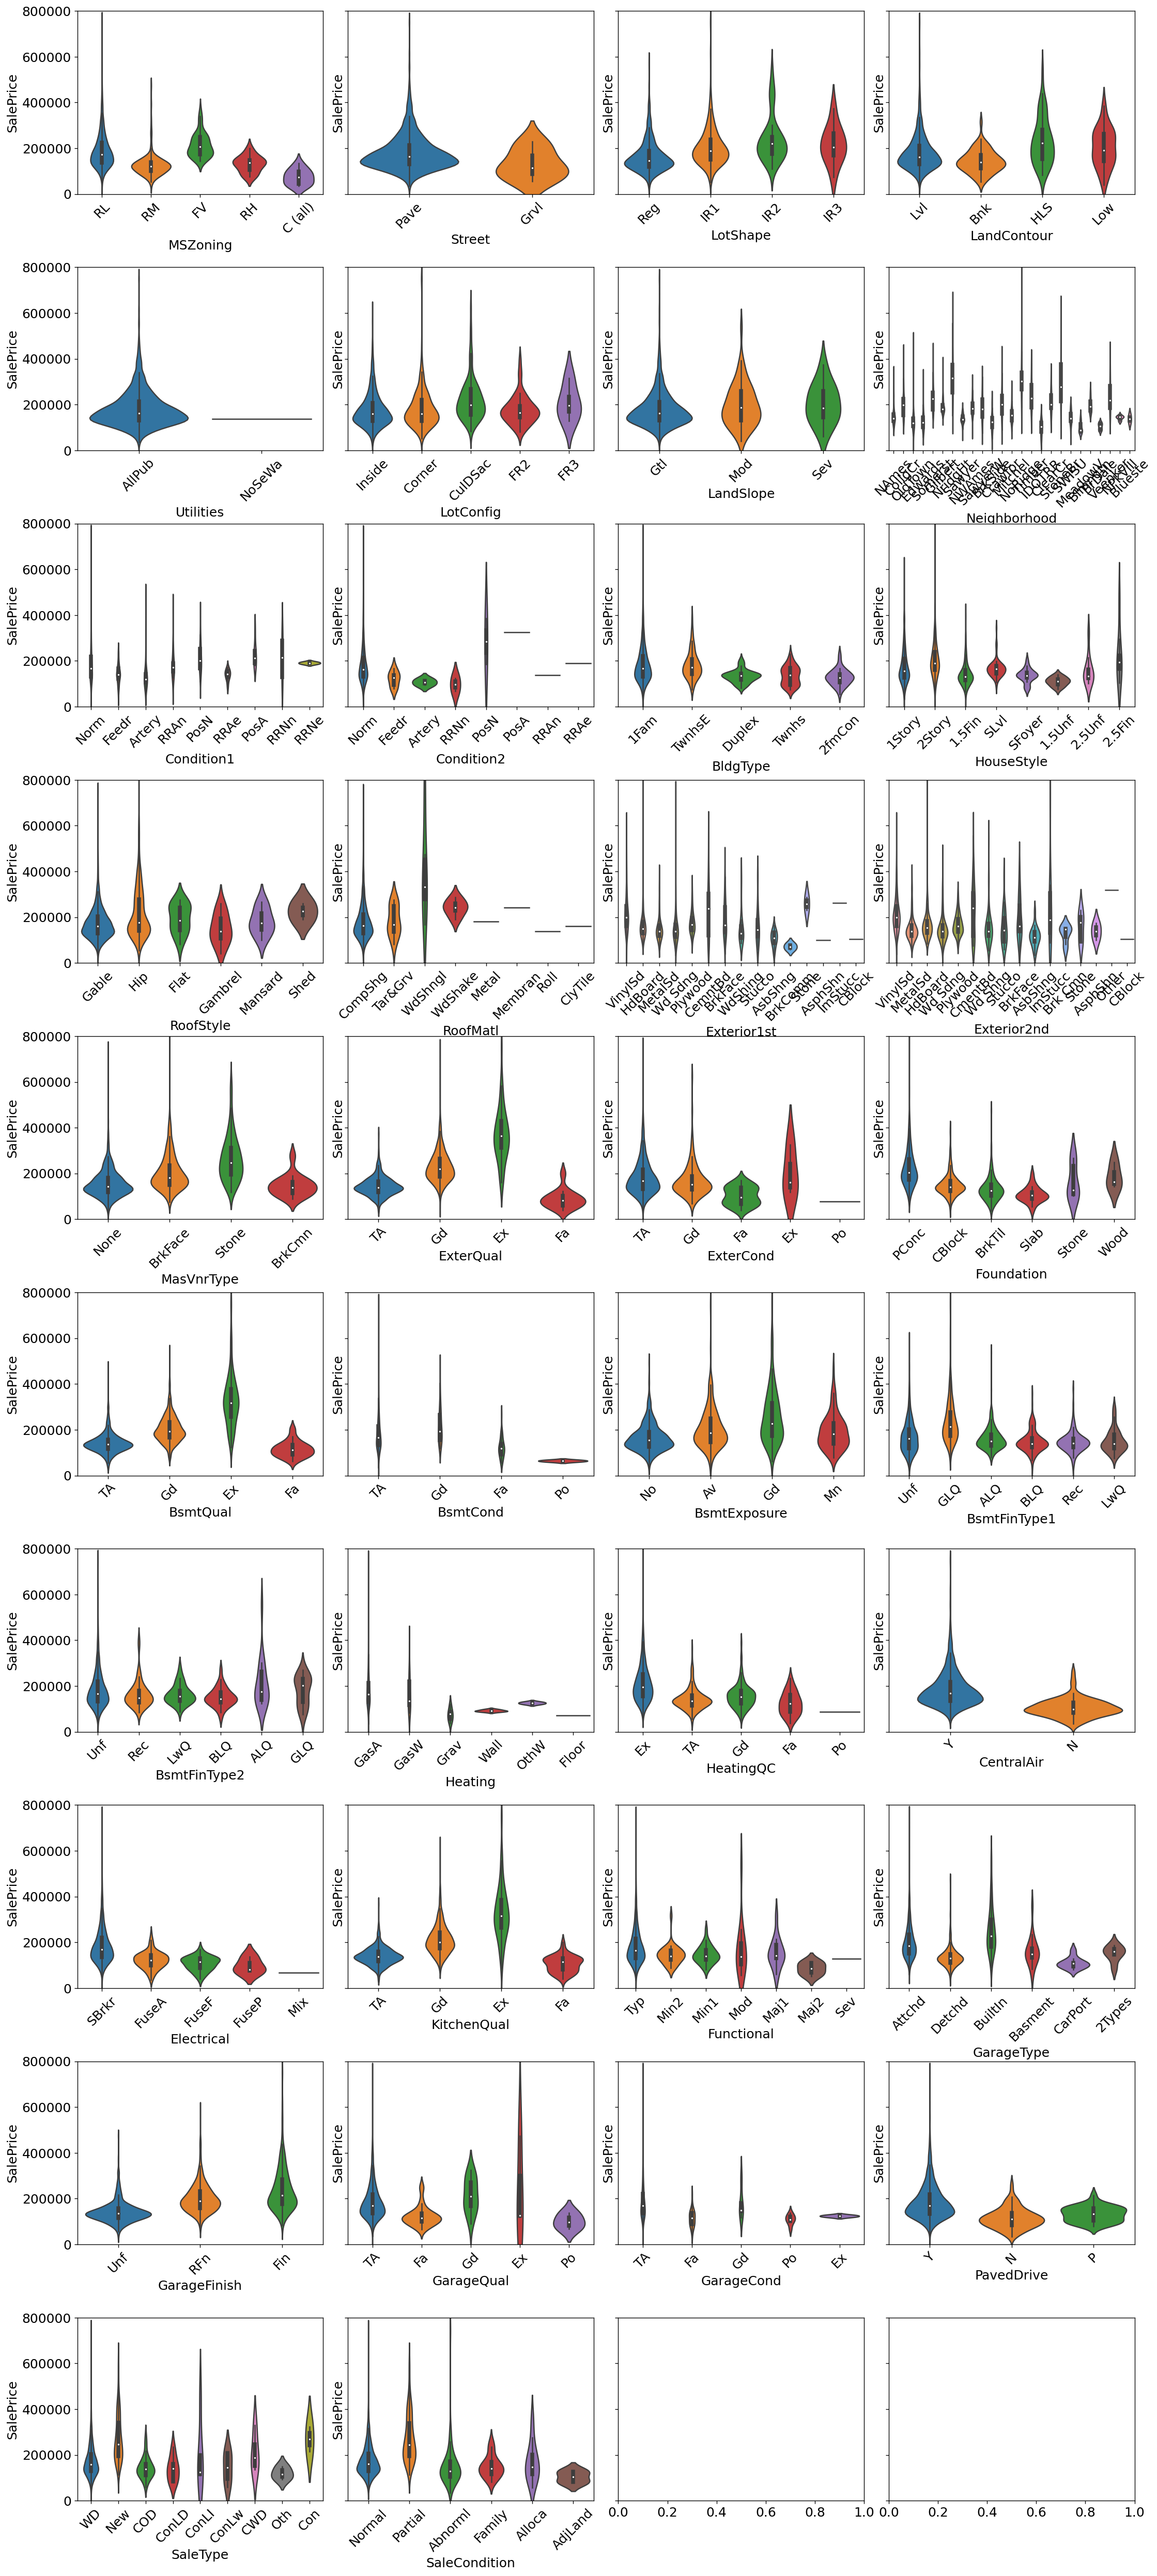

<IPython.core.display.Javascript object>

In [25]:
fig, ax = plt.subplots(
    nrows=ceil(len(object_cols) / 4),
    ncols=4,
    figsize=(22, 1.4 * len(object_cols)),
    sharey=True,
    dpi=120,
)

for col, subplot in zip(object_cols, ax.flatten()):
    freq = data[col].value_counts()
    subplot.ticklabel_format(style="plain")
    plt.ylim([0, 800000])
    plt.subplots_adjust(wspace=0.1, hspace=0.4)
    for tick in subplot.get_xticklabels():
        tick.set_rotation(45)
    sns.violinplot(data=data, x=col, y=y, order=freq.index, ax=subplot)

In [26]:
# from the violin plot above, it is evident that the utilitie column is dominated by one category
# i will check the value counts of other categorical columns to be sure
for i in object_cols:
    print(f"Feature Name = {i}")
    print("")
    print(data[i].value_counts(normalize=True))
    print(80 * "-")
    print("")

Feature Name = MSZoning

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
--------------------------------------------------------------------------------

Feature Name = Street

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
--------------------------------------------------------------------------------

Feature Name = LotShape

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
--------------------------------------------------------------------------------

Feature Name = LandContour

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
--------------------------------------------------------------------------------

Feature Name = Utilities

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
--------------------------------------------------------------------------------

Feature 

<IPython.core.display.Javascript object>

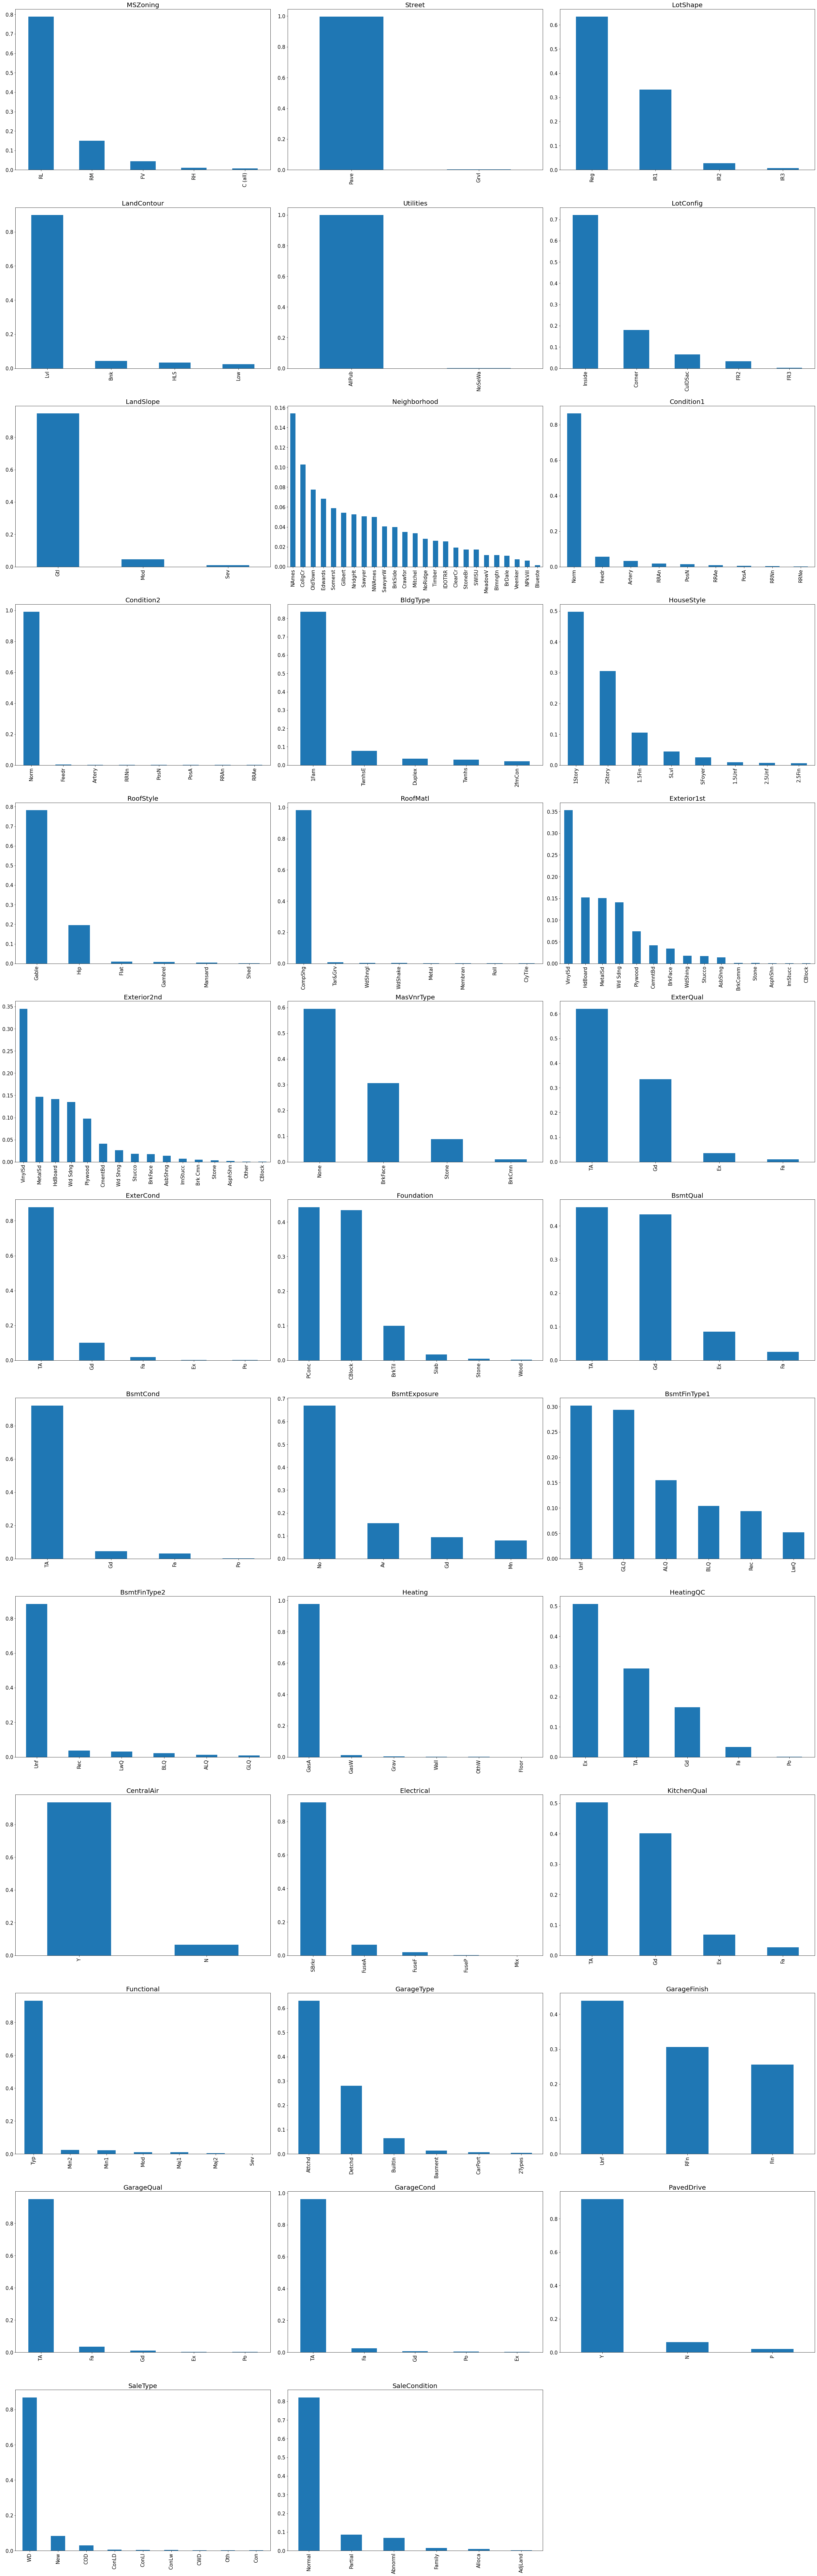

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(35, 110))

for i, variable in enumerate(object_cols):
    plt.subplot(13, 3, i + 1)
    data[variable].value_counts(normalize=True).plot(kind="bar")
    plt.tight_layout()
    plt.title(variable)

plt.show()

- From the above visualization, the "Utilities", "Street","RoofMatl", "Heating" columns has about 98% or more of the values under one category

In [28]:
# Checking the value_counts of the above mentioned columns in test data
for i in ["Utilities", "Street", "RoofMatl", "Heating"]:
    print(f"Feature Name = {i}")
    print("")
    print(data_test[i].value_counts(normalize=True))
    print(80 * "-")
    print("")

Feature Name = Utilities

AllPub    1.0
Name: Utilities, dtype: float64
--------------------------------------------------------------------------------

Feature Name = Street

Pave    0.995888
Grvl    0.004112
Name: Street, dtype: float64
--------------------------------------------------------------------------------

Feature Name = RoofMatl

CompShg    0.988348
Tar&Grv    0.008225
WdShake    0.002742
WdShngl    0.000685
Name: RoofMatl, dtype: float64
--------------------------------------------------------------------------------

Feature Name = Heating

GasA    0.991090
GasW    0.006169
Grav    0.001371
Wall    0.001371
Name: Heating, dtype: float64
--------------------------------------------------------------------------------



<IPython.core.display.Javascript object>

- These columns seems to have most of the rows having only one category even inthe test data. so I ill drop the solumns for both train and test data

In [29]:
data.drop(["Utilities", "Street", "RoofMatl", "Heating"], axis=1, inplace=True)
test_data.drop(["Utilities", "Street", "RoofMatl", "Heating"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# Feature Engineering

In [30]:
# to reduce the stress of working on both train and test data differently i will merge both dataset and process them them together
df = pd.concat([data, test_data])

<IPython.core.display.Javascript object>

### Creating New Numerical Features

In [31]:
df1 = pd.DataFrame()  # dataframe to hold new features

# Age of House when sold
df1["Age"] = df["YrSold"] - df["YearBuilt"]

# Years between Remodeling and sales
df1["AgeRemodel"] = df["YrSold"] - df["YearRemodAdd"]

Years = ["YrSold", "YearBuilt", "YearRemodAdd"]
year_cols = ["YrSold", "YearBuilt", "YearRemodAdd", "AgeRemodel", "Age"]
df_1 = pd.concat([df, df1], axis=1).loc[:, year_cols]

# Extracting the train data from the merged data. (using the unique index of train dataset as row)
X_1 = df_1.loc[data.index, :]
X_1.sample(3)

YrSold  YearBuilt  YearRemodAdd  AgeRemodel  Age
Id                                                   
597    2006       1910          1993          13   96
752    2007       2003          2003           4    4
543    2009       1998          1999          10   11

<IPython.core.display.Javascript object>

In [32]:
df_1.head()

YrSold  YearBuilt  YearRemodAdd  AgeRemodel  Age
Id                                                  
1     2008       2003          2003           5    5
2     2007       1976          1976          31   31
3     2008       2001          2002           6    7
4     2006       1915          1970          36   91
5     2008       2000          2000           8    8

<IPython.core.display.Javascript object>

#### Visualizing the year columns

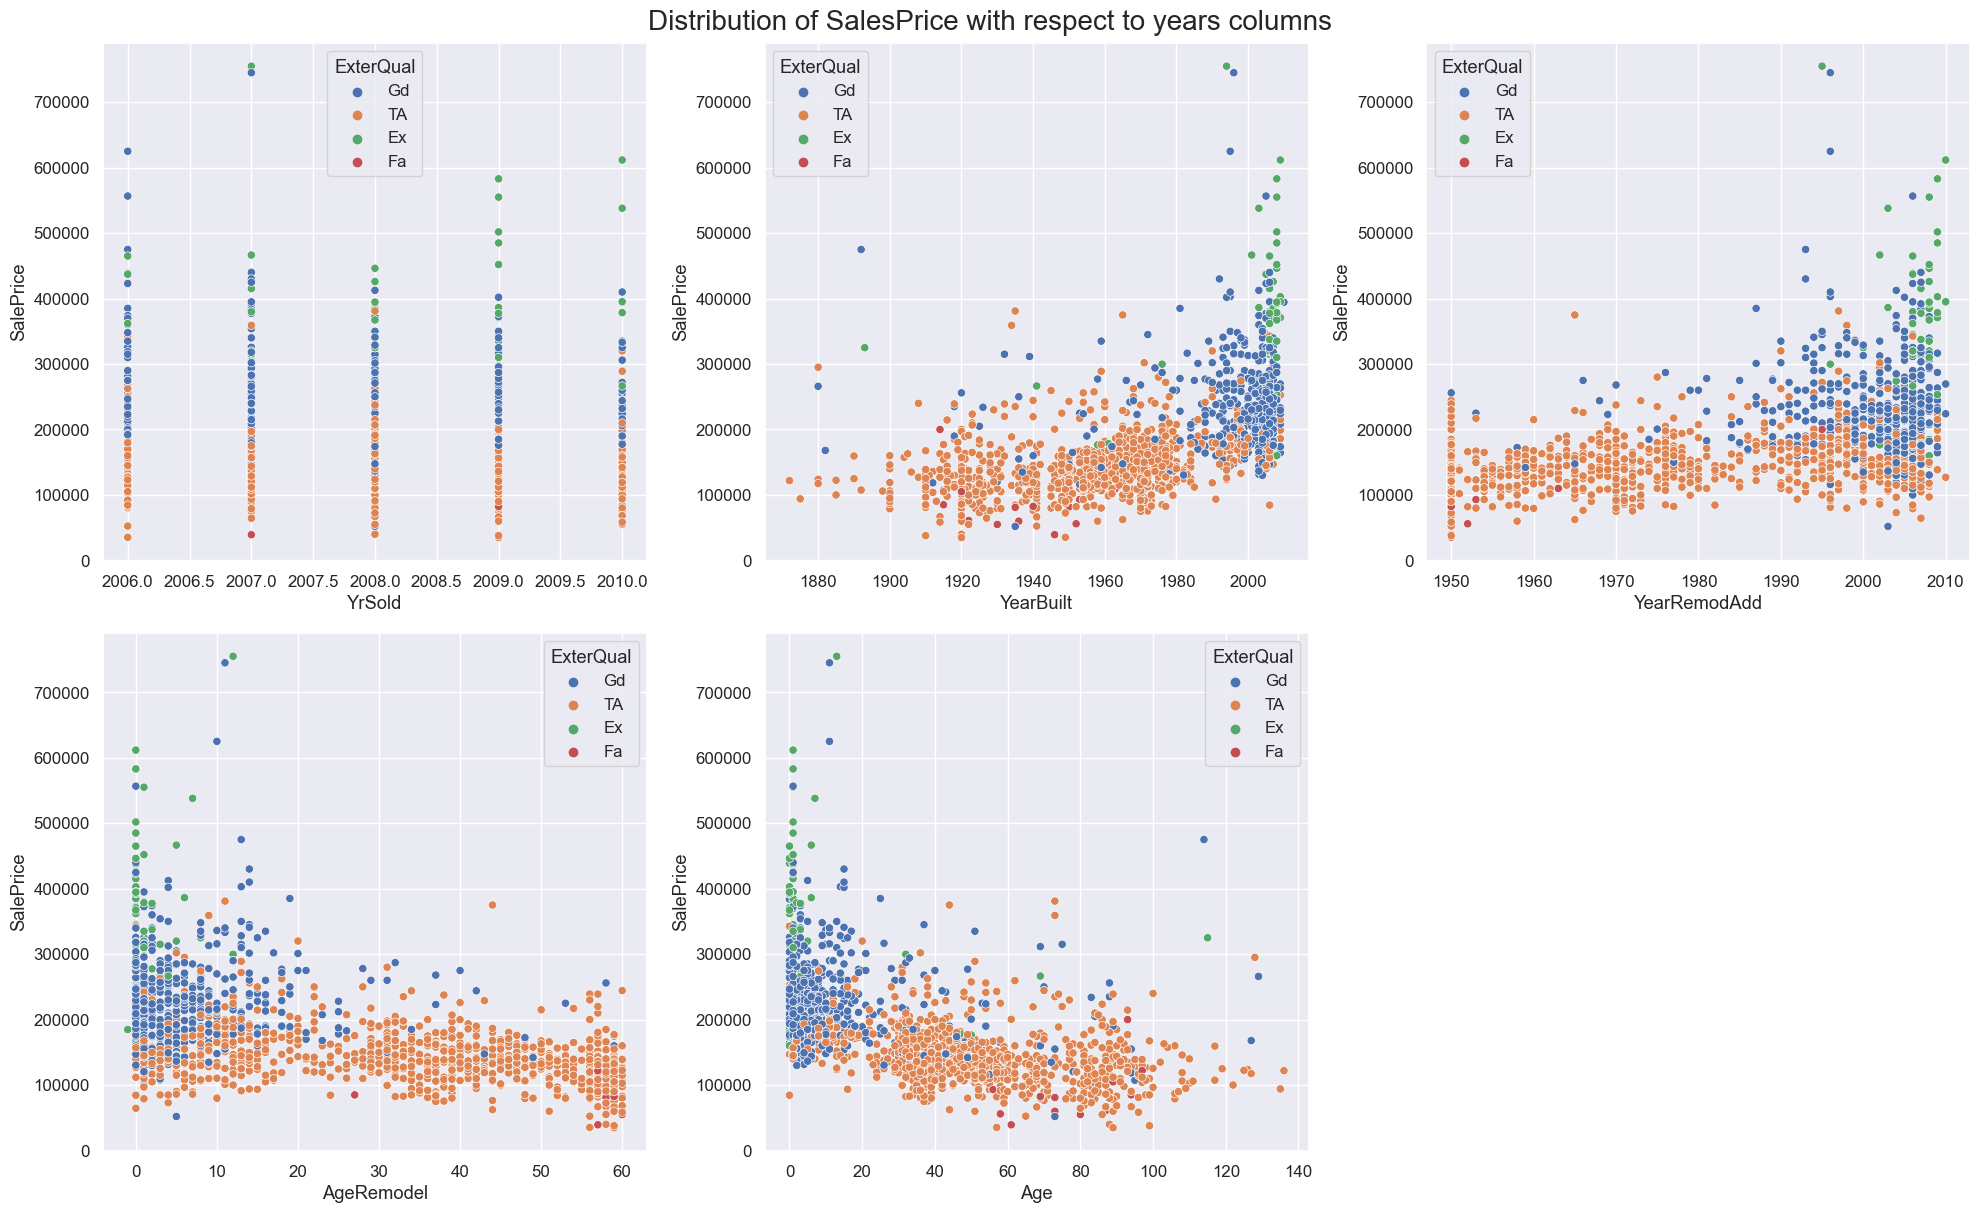

<IPython.core.display.Javascript object>

In [33]:
sns.set(style="whitegrid")
sns.set_context(
    "paper", rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20}
)
sns.set(
    rc={
        "figure.figsize": (11.7, 8.27),
        "font.size": 20,
        "axes.titlesize": 20,
        "axes.labelsize": 20,
    },
    style="white",
)
sns.set(font_scale=1.1)
fig, ax = plt.subplots(1, 5, figsize=(20, 12), dpi=100)


# scatterplot

for i, variable in enumerate(year_cols):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(
        x=X_1.loc[:, variable],
        y=y,
        hue=data.ExterQual,
        # palette="pastel",
    )

fig.tight_layout()
fig.text(
    0.5,
    1,
    "Distribution of SalesPrice with respect to years columns",
    size=20,
    ha="center",
    va="center",
)
plt.show()

- Most of the houses with "Gd" and "Ex" Exterior material quality(ExterQual) are more expensive
- Newer houses are also more expensive
- Houses that were also recently remodeled are alse more expensive

In [34]:
# Checking Correlation of year columns with SalePrice
X_1.corrwith(y)

YrSold         -0.028923
YearBuilt       0.522897
YearRemodAdd    0.507101
AgeRemodel     -0.509079
Age            -0.523350
dtype: float64

<IPython.core.display.Javascript object>

##  Creating New Boolean Features
**Remodel column:**
* False (for 764 houses having Remodel date same as construction date i.e. no modeling or additions)
* True (for 696 houses with modeling or additions done)

**Garage column:**
* False (for 81 rows having missing values in columns GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond)

**Fireplace column:**
* False (for 690 rows having missing values in column FireplaceQu)

**Basement column:**
* False (for 37 rows having missing values in columns BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2)

**Masonry veneer column:**
* False (for 8 rows having missing values in columns MasVnrType, MasVnrArea)

In [35]:
df2 = pd.DataFrame()  # dataframe to hold new features

df2["Remodel"] = df["YearRemodAdd"] != df["YearBuilt"]
df2["Garage"] = df["GarageQual"].notnull()
# df2["Fireplace"] = df["FireplaceQu"].notnull()
df2["Bsmt"] = df["BsmtQual"].notnull()
df2["Masonry"] = df["MasVnrType"].notnull()

# Converting boolean columns [False,True] into numerical columns [0,1]
df2 = df2.replace([False, True], [0, 1])
df2.sample(3)

Remodel  Garage  Bsmt  Masonry
Id                                  
2431        0       1     1        1
291         0       1     1        1
1203        1       1     1        1

<IPython.core.display.Javascript object>

### Dealing with Ordinal Categorical Features

#### Replacing ordered categories with numbers

In [36]:
# Creating the object columns
object_cols = df.select_dtypes(include=["object"]).columns

# Categorical Columns with number of unuque categoies in them
df[object_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
HouseStyle        8
Condition2        8
Functional        7
RoofStyle         6
Foundation        6
SaleCondition     6
BsmtFinType1      6
GarageType        6
BsmtFinType2      6
GarageQual        5
Electrical        5
HeatingQC         5
GarageCond        5
MSZoning          5
ExterCond         5
BldgType          5
LotConfig         5
BsmtExposure      4
BsmtCond          4
LotShape          4
ExterQual         4
KitchenQual       4
MasVnrType        4
LandContour       4
BsmtQual          4
GarageFinish      3
LandSlope         3
PavedDrive        3
CentralAir        2
dtype: int64

<IPython.core.display.Javascript object>

In [37]:
# Extracting the ordinal features from the rest of the columns
ordinal_cols = [
    i
    for i in object_cols
    if ("QC" in i)
    or ("Qu" in i)
    or ("Fin" in i)
    or ("Cond" in i)
    and ("Condition" not in i)
]
df.loc[:, ordinal_cols] = df.loc[:, ordinal_cols].fillna("NA")
print("Column Names: [Unique Categories in each column]")
{col: [*df[col].unique()] for col in ordinal_cols}

Column Names: [Unique Categories in each column]


{'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 'NA', 'Fa'],
 'BsmtCond': ['TA', 'Gd', 'NA', 'Fa', 'Po'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa', 'NA'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', 'NA'],
 'GarageQual': ['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex']}

<IPython.core.display.Javascript object>

In [38]:
# 1] Columns with similar ordered categories [Poor<Fair<Typical/Average<Good<Excellent]
ordinal_cols1 = [
    i
    for i in object_cols
    if ("QC" in i) or ("Qu" in i) or ("Cond" in i) and ("Condition" not in i)
]
df.loc[:, ordinal_cols1] = df.loc[:, ordinal_cols1].replace(
    ["NA", "Po", "Fa", "TA", "Gd", "Ex"], [0, 1, 2, 3, 4, 5]
)

# 2] Columns with similar ordered categories [No Garage/Basement<Unfinished<Rough Finished<Finished,etc]
ordinal_cols2 = ["BsmtFinType1", "BsmtFinType2"]
df.loc[:, ordinal_cols2] = df.loc[:, ordinal_cols2].replace(
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], [0, 1, 2, 3, 4, 5, 6]
)

# 3] Column with ordered categories [No Basement<No Exposure<Mimimum Exposure<Average Exposure<Good Exposure]
ordinal_cols3 = ["BsmtExposure"]
df.loc[:, ordinal_cols3] = df.loc[:, ordinal_cols3].fillna("NA")
df.loc[:, ordinal_cols3] = df.loc[:, ordinal_cols3].replace(
    ["NA", "No", "Mn", "Av", "Gd"], [0, 1, 2, 3, 4]
)

# 4] Column with ordered categories [Regular<Slightly irregular<Moderately Irregular<Irregular]
ordinal_cols4 = ["LotShape"]
df.loc[:, ordinal_cols4] = df.loc[:, ordinal_cols4].replace(
    ["Reg", "IR1", "IR2", "IR3"], [0, 1, 2, 3]
)

# 5] Column with ordered categories [No Garage<Unfinished<Rough Finished<Finished]
ordinal_cols5 = ["GarageFinish"]
df.loc[:, ordinal_cols5] = df.loc[:, ordinal_cols5].replace(
    ["NA", "Unf", "RFn", "Fin"], [0, 1, 2, 3]
)

# 6] Home functionality Column
ordinal_cols6 = ["Functional"]
df.loc[:, ordinal_cols3] = df.loc[:, ordinal_cols3].fillna("Mod")
df.loc[:, ordinal_cols6] = df.loc[:, ordinal_cols6].replace(
    ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], list(range(8))
)

<IPython.core.display.Javascript object>

In [39]:
o_columns = (
    ordinal_cols1
    + ordinal_cols2
    + ordinal_cols3
    + ordinal_cols4
    + ordinal_cols5
    + ordinal_cols6
)
df.loc[:, o_columns].dtypes.value_counts()

int64      13
float64     1
dtype: int64

<IPython.core.display.Javascript object>

## Creating features using mathematical transformations

In [40]:
# on observation, some of the columns have bath in them indicating bathrooms
Bath_cols = [i for i in df.columns if "Bath" in i]
Bath_cols

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

<IPython.core.display.Javascript object>

In [41]:
df[Bath_cols].sample(3)

BsmtFullBath  BsmtHalfBath  FullBath  HalfBath
Id                                                  
2719           1.0           0.0         2         0
2454           0.0           0.0         2         0
1627           0.0           0.0         2         1

<IPython.core.display.Javascript object>

In [42]:
SF_cols = ["TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]
df[SF_cols + Bath_cols] = df[SF_cols + Bath_cols].fillna(0)

<IPython.core.display.Javascript object>

In [43]:
df3 = pd.DataFrame()  # dataframe to hold new features

df3["Liv_Qual"] = (df.OverallQual + df.OverallCond / 3) * df.GrLivArea
df3["GarageArea_Qual"] = (
    (df.GarageQual + df.GarageCond / 3) * df.GarageArea * df.GarageCars
)
df3["BsmtArea_Qual"] = (df.BsmtQual * df.BsmtCond / 3) * df.TotalBsmtSF
df3["LivLotRatio"] = df.GrLivArea / df.LotArea
df3["Spaciousness"] = (df["1stFlrSF"] + df["2ndFlrSF"]) / df.TotRmsAbvGrd
df3["TotalSF"] = df[SF_cols].sum(axis=1)
df3["TotalBath"] = df.FullBath + df.BsmtFullBath + df.HalfBath / 2 + df.BsmtHalfBath / 2
df3["Garage_Spaciousness"] = df.GarageArea / (df.GarageCars + 1)
df3["BsmtQual_SF"] = (
    ((df.BsmtQual + df.BsmtCond / 2 + df.BsmtExposure / 3) * df.TotalBsmtSF)
    + (df.BsmtFinType1 * df.BsmtFinSF1)
    + (df.BsmtFinType2 * df.BsmtFinSF2)
)

<IPython.core.display.Javascript object>

In [44]:
df3.sample(3)

Liv_Qual  GarageArea_Qual  BsmtArea_Qual  LivLotRatio  Spaciousness  \
Id                                                                          
2300   23055.0           9816.0         6585.0     0.167052    340.714286   
565    19890.0           4720.0         4380.0     0.171962    255.000000   
366     9856.0           1716.0         1344.0     0.125725    224.000000   

      TotalSF  TotalBath  Garage_Spaciousness  BsmtQual_SF  
Id                                                          
2300   3702.0        3.5           204.500000      15066.5  
565    3390.0        3.5           196.666667      10755.5  
366    2016.0        1.0           234.000000       4280.0

<IPython.core.display.Javascript object>

### Creating features using count

In [45]:
# Making a list of features ith porches
Porches = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]

# observing the fist 5 rows of the dataframe with porches
df[Porches].head(3)

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
Id                                                                
1            0           61              0          0            0
2          298            0              0          0            0
3            0           42              0          0            0

<IPython.core.display.Javascript object>

In [46]:
df[Porches].gt(0.0).head(3)

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
Id                                                                
1        False         True          False      False        False
2         True        False          False      False        False
3        False         True          False      False        False

<IPython.core.display.Javascript object>

In [47]:
df4 = pd.DataFrame()  # dataframe to hold new features
# Creating a datafram to sum up number of porches in a house
df4["PorchTypes"] = df[Porches].gt(0.0).sum(axis=1)
df4["PorchTypes"].head()

Id
1    1
2    1
3    1
4    2
5    2
Name: PorchTypes, dtype: int64

<IPython.core.display.Javascript object>

### Creating features using group transforms

In [48]:
df5 = pd.DataFrame()  # dataframe to hold new features
# finding the meadian above ground living area grouped by Neighborhood
df5["MedNhbdArea"] = df.groupby("Neighborhood")["GrLivArea"].transform("median")
df5.head()

MedNhbdArea
Id             
1        1504.0
2        1706.5
3        1504.0
4        1648.0
5        2418.0

<IPython.core.display.Javascript object>

### Creating features using feature interactions

In [49]:
df6 = pd.DataFrame()  # dataframe to hold new features

# Creating Dummy Variables
df6 = pd.get_dummies(df.BldgType, prefix="Bldg")

# Multiplying the dummy variables with above ground living area
df6 = df6.mul(df.GrLivArea, axis=0)

<IPython.core.display.Javascript object>

In [50]:
df6.head(5)

Bldg_1Fam  Bldg_2fmCon  Bldg_Duplex  Bldg_Twnhs  Bldg_TwnhsE
Id                                                              
1        1710            0            0           0            0
2        1262            0            0           0            0
3        1786            0            0           0            0
4        1717            0            0           0            0
5        2198            0            0           0            0

<IPython.core.display.Javascript object>

### Handling rare categorical values

In [51]:
# checking the number of unique values of all categorical features
cat_columns = list(df.select_dtypes("object").columns)
df[cat_columns].nunique().sum()

150

<IPython.core.display.Javascript object>

- There are alot of unique values and a some of them are rarely used.
- I will replace these rare categories that constistute less than 1% of the total column entry with "other"

In [52]:
for col in cat_columns:
    df[col] = df[col].mask(
        df[col].map(df[col].value_counts(normalize=True)) < 0.01, "Other"
    )

<IPython.core.display.Javascript object>

In [53]:
# CHecking the number unique values of the categorical columns again
df[cat_columns].nunique().sum()

114

<IPython.core.display.Javascript object>

- The number of unique values dropped from 150 to 114

In [54]:
df.HouseStyle.value_counts(normalize=True) * 100

1Story    50.393971
2Story    29.873244
1.5Fin    10.757109
SLvl       4.385063
SFoyer     2.843440
Other      1.747174
Name: HouseStyle, dtype: float64

<IPython.core.display.Javascript object>

### Nominative (unordered) categorical features

In [55]:
# Note: `MSSubClass` feature is read as an `int` type, but is actually a (nominative) categorical.

features_nom = ["MSSubClass"] + cat_columns

# Cast each of the above 23 columns into 'category' DataType
for name in features_nom:
    df[name] = df[name].astype("category")

    # Add a None category for missing values
    if "None" not in df[name].cat.categories:
        df[name] = df[name].cat.add_categories("None")

<IPython.core.display.Javascript object>

In [56]:
# Label encoding for categoricals
for colname in df.select_dtypes(["category"]):
    df[colname] = df[colname].cat.codes

<IPython.core.display.Javascript object>

In [57]:
df.dtypes.value_counts()

int64      37
int8       21
float64    12
dtype: int64

<IPython.core.display.Javascript object>

### Concat Created Features with Original Features

In [58]:
df.shape

(2919, 70)

<IPython.core.display.Javascript object>

In [59]:
df.drop(Years + Porches, axis=1, inplace=True)
df = pd.concat([df, df1, df2, df3, df4, df5, df6], axis=1)
df.sample(3)

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
Id                                                                        
2015           5         2         43.0    14565         2            3   
2623           5         2         50.0    13128         1            1   
561            0         2          NaN    11341         1            3   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
Id                                                                           
2015          1          0            18           2           0         0   
2623          1          0             6           2           0         0   
561           3          0            17           2           0         0   

      HouseStyle  OverallQual  OverallCond  RoofStyle  Exterior1st  \
Id                                                                   
2015           2            7            5          0            8   
2623           2            8            5          0            8   
561            1            5            6          1            9   

      Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
Id                                                                            
2015            8           0       145.0          4          3           3   
2623            8           0       216.0          4          3           3   
561             9           0       180.0          3          3           1   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
Id                                                                 
2015         4         3             3             6       537.0   
2623         4         3             1             1         0.0   
561          4         3             1             5      1302.0   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
Id                                                                              
2015             1         0.0      295.0        832.0          5           1   
2623             1         0.0     1074.0       1074.0          5           1   
561              1         0.0       90.0       1392.0          3           1   

      Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
Id                                                                            
2015           3       832       825             0       1657           0.0   
2623           3      1074       990             0       2064           0.0   
561            3      1392         0             0       1392           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                   
2015           0.0         2         1             3             1   
2623           0.0         2         1             4             1   
561            0.0         1         1             3             1   

      KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  \
Id                                                                    
2015            4             6         7.0           0           0   
2623            4             7         7.0           1           0   
561             3             5         4.0           1           3   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
Id                                                                    
2015       1994.0             2         2.0       483.0           3   
2623       2005.0             3         2.0       527.0           3   
561        1957.0             1         2.0       528.0           3   

      GarageCond  PavedDrive  PoolArea  MiscVal  MoSold  SaleType  \
Id                                                                  
2015           3           2         0     2000      11         3   
2623           3           2         0        0       1         3   
561       

<IPython.core.display.Javascript object>

In [60]:
df.shape

(2919, 84)

<IPython.core.display.Javascript object>

In [61]:
# Reform splits into train and test
X = df.loc[data.index, :]
X_test = df.loc[test_data.index, :]

<IPython.core.display.Javascript object>

In [62]:
print("training dataset", X.shape, "", "test dataset", X_test.shape, sep="\n")

training dataset
(1460, 84)

test dataset
(1459, 84)


<IPython.core.display.Javascript object>

# Data Visualization

In [63]:
X_y = X.copy()

# Adding the target variable to the data
X_y["SalesPrice"] = y
X_y.sample()

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
Id                                                                        
1360           0         2        129.0    16737         0            3   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
Id                                                                           
1360          4          0            13           2           0         0   

      HouseStyle  OverallQual  OverallCond  RoofStyle  Exterior1st  \
Id                                                                   
1360           1            9            5          1            8   

      Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
Id                                                                            
1360            8           0        66.0          4          3           3   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
Id                                                                 
1360         5         3             3             6      1447.0   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
Id                                                                              
1360             1         0.0      533.0       1980.0          5           1   

      Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
Id                                                                            
1360           3      1980         0             0       1980           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                   
1360           0.0         2         0             3             1   

      KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  \
Id                                                                    
1360            5             8         7.0           1           0   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
Id                                                                    
1360       2004.0             3         3.0       770.0           3   

      GarageCond  PavedDrive  PoolArea  MiscVal  MoSold  SaleType  \
Id                                                                  
1360           3           2         0        0       9         3   

      SaleCondition  Age  AgeRemodel  Remodel  Garage  Bsmt  Masonry  \
Id                                                                     
1360              2    2           1        1       1     1        1   

      Liv_Qual  GarageArea_Qual  BsmtArea_Qual  LivLotRatio  Spaciousness  \
Id                                                                          
1360   21120.0           9240.0         9900.0     0.118301         247.5   

      TotalSF  TotalBath  Garage_Spaciousness  BsmtQual_SF  PorchTypes  \
Id                                                                       
1360   3960.0        3.0                192.5      23532.0           2   

      MedNhbdArea  Bldg_1Fam  Bldg_2fmCon  Bldg_Duplex  Bldg_Twnhs  \
Id                                                                   
1360       1832.0       1980            0            0           0   

      Bldg_TwnhsE  SalesPrice  
Id                             
1360            0      315000

<IPython.core.display.Javascript object>

In [64]:
def univariate_numerical_plot(df, x):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=100)

    # 0) histogram
    sns.histplot(
        data=df,
        x=x,
        kde=True,
        ax=ax[0],
        bins=min(df[x].nunique(), 10),
        kde_kws={"bw_adjust": 3},
    )
    sns.despine(bottom=True, left=True)
    ax[0].set_title("histogram")
    ax[0].set_xlabel(xlabel=x)

    # 1) box plot
    sns.boxplot(data=df, x=x, ax=ax[1])
    ax[1].set_title("boxplot")
    ax[1].set_ylabel(ylabel=x)

    # 2) scatterplot
    sns.scatterplot(x=df[x], y=y, ax=ax[2], hue=y, palette="coolwarm")
    plt.legend([], [], frameon=False)

    # To add border
    fig.subplots_adjust(top=0.85, bottom=0.15, left=0.2, hspace=0.8)
    fig.patch.set_linewidth(10)
    fig.patch.set_edgecolor("cornflowerblue")

    fig.tight_layout()
    fig.text(0.5, 1, f"Distribution of {x}", size=25, ha="center", va="center")
    plt.show()

<IPython.core.display.Javascript object>

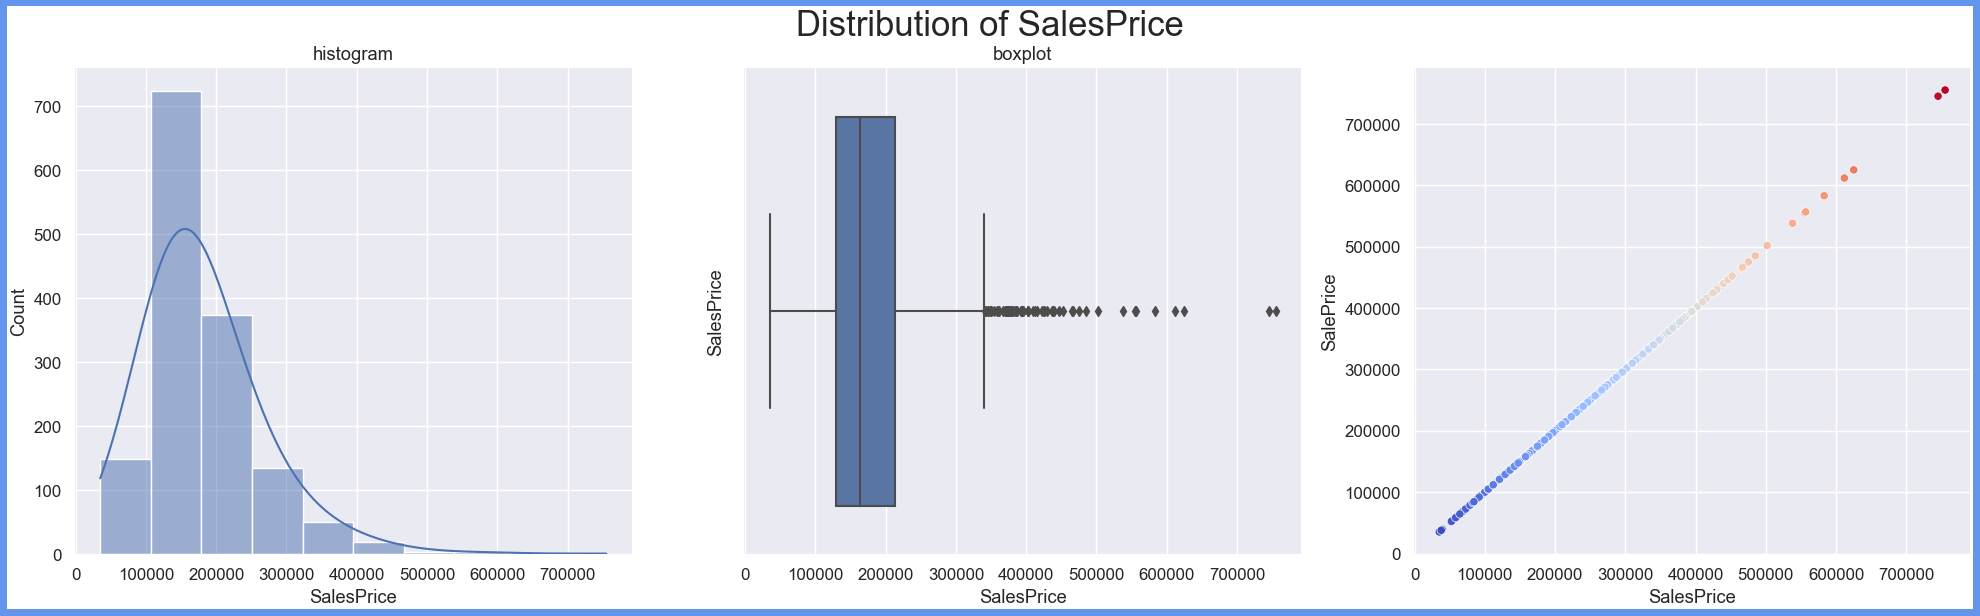

<IPython.core.display.Javascript object>

In [65]:
# Check distribution of target variable
univariate_numerical_plot(X_y, "SalesPrice")

# Correlation of X with y

In [66]:
# Replacing missing values in numerical columns with zero
for name in X.select_dtypes("number"):
    X[name] = X[name].fillna(0)

<IPython.core.display.Javascript object>

In [67]:
def make_mi_scores(X, y):
    X = X.copy()
    # All discrete features should now have integer dtypes
    # discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X.select_dtypes("number"), y, random_state=0)
    mi_scores = pd.DataFrame(
        mi_scores.round(2),
        columns=["MI_Scores"],
        index=X.select_dtypes("number").columns,
    )
    return mi_scores

<IPython.core.display.Javascript object>

In [68]:
mi_scores = make_mi_scores(X, y)
linear_corr = pd.DataFrame(X.corrwith(y).round(2), columns=["Lin_Correlation"])

corr_with_price = pd.concat([mi_scores, linear_corr], axis=1)
corr_with_price = corr_with_price.sort_values("MI_Scores", ascending=False)

corr_with_price

MI_Scores  Lin_Correlation
Liv_Qual                  0.73             0.82
TotalSF                   0.68             0.78
OverallQual               0.54             0.79
Neighborhood              0.49             0.20
MedNhbdArea               0.48             0.66
GrLivArea                 0.48             0.71
BsmtArea_Qual             0.47             0.72
Bldg_1Fam                 0.45             0.57
BsmtQual_SF               0.42             0.66
GarageArea_Qual           0.39             0.69
TotalBath                 0.37             0.63
GarageArea                0.37             0.62
TotalBsmtSF               0.37             0.61
GarageCars                0.35             0.64
BsmtQual                  0.35             0.59
Age                       0.34            -0.52
KitchenQual               0.32             0.66
ExterQual                 0.31             0.68
1stFlrSF                  0.31             0.61
MSSubClass                0.28            -0.06
GarageFinish              0.26             0.55
AgeRemodel                0.26            -0.51
GarageYrBlt               0.26             0.26
Spaciousness              0.25             0.55
FullBath                  0.25             0.56
Garage_Spaciousness       0.24             0.41
TotRmsAbvGrd              0.22             0.53
GarageType                0.21            -0.23
LotFrontage               0.21             0.21
2ndFlrSF                  0.20             0.32
Foundation                0.19             0.44
HeatingQC                 0.17             0.43
Fireplaces                0.17             0.47
LotArea                   0.16             0.26
Exterior2nd               0.16             0.09
BsmtFinSF1                0.15             0.39
BsmtFinType1              0.15             0.30
Exterior1st               0.13             0.10
BsmtUnfSF                 0.12             0.21
MSZoning                  0.12            -0.21
OverallCond               0.11            -0.08
PorchTypes                0.11             0.41
MasVnrType                0.11             0.10
MasVnrArea                0.09             0.47
LotShape                  0.09             0.27
LivLotRatio               0.09            -0.00
GarageQual                0.08             0.27
SaleType                  0.08            -0.21
SaleCondition             0.08             0.32
HalfBath                  0.08             0.28
HouseStyle                0.08             0.06
BedroomAbvGr              0.07             0.17
BsmtExposure              0.07             0.37
GarageCond                0.07             0.26
Garage                    0.07             0.24
PavedDrive                0.06             0.23
Bldg_TwnhsE               0.05             0.04
BsmtCond                  0.05             0.21
KitchenAbvGr              0.05            -0.14
CentralAir                0.05             0.25
Electrical                0.05             0.23
BldgType                  0.05            -0.09
LandContour               0.04             0.02
Bsmt                      0.04             0.15
Condition1                0.03             0.12
Remodel                   0.03            -0.02
Bldg_Duplex               0.03            -0.10
BsmtFinType2              0.03            -0.01
Bldg_Twnhs                0.02            -0.08
BsmtHalfBath              0.02            -0.02
LandSlope                 0.01             0.05
Bldg_2fmCon               0.01            -0.08
Functional                0.01             0.11
RoofStyle                 0.01             0.19
ExterCond                 0.01             0.02
MiscVal                   0.01            -0.02
BsmtFullBath              0.01             0.23
Masonry                   0.01            -0.05
Condition2                0.00            -0.03
BsmtFinSF2                0.00            -0.01
LowQualFinSF              0.00            -0.03
LotConfig                 0.00            -0.06
MoSold                    0.00       

<IPython.core.display.Javascript object>

## Distribution of top 5 features correlated with Sales Price

In [69]:
top_features = corr_with_price.index[1:6]

<IPython.core.display.Javascript object>

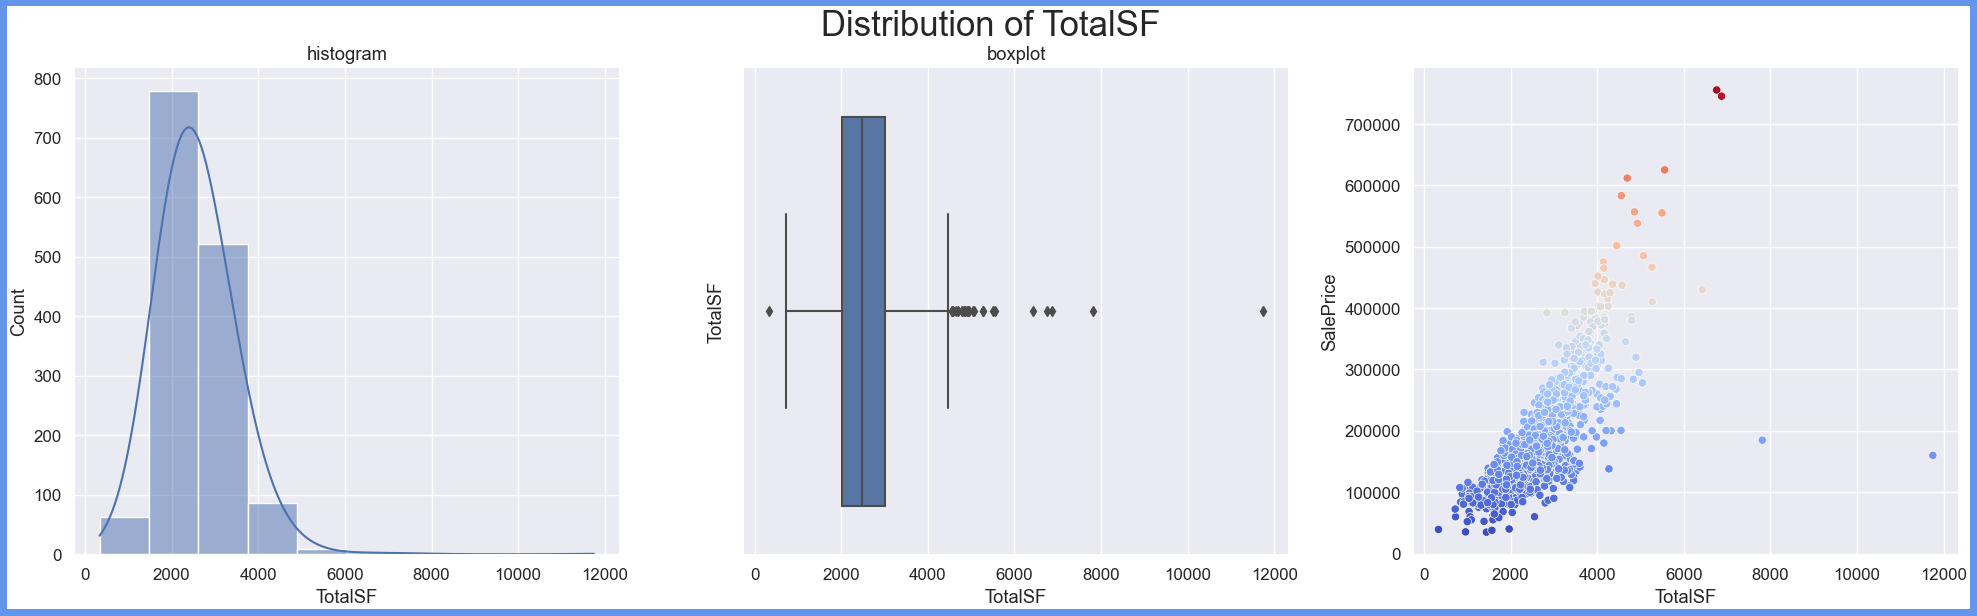

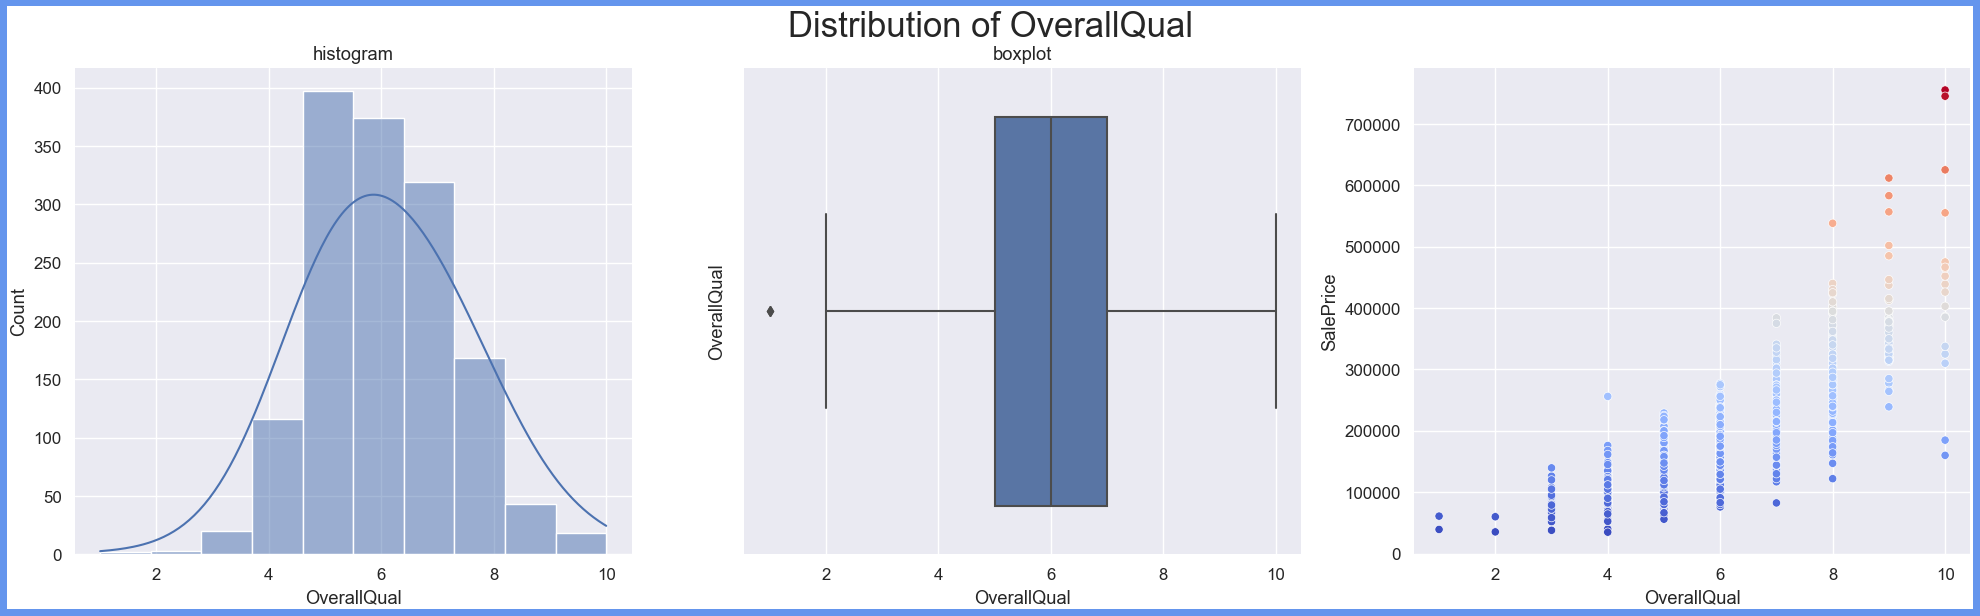

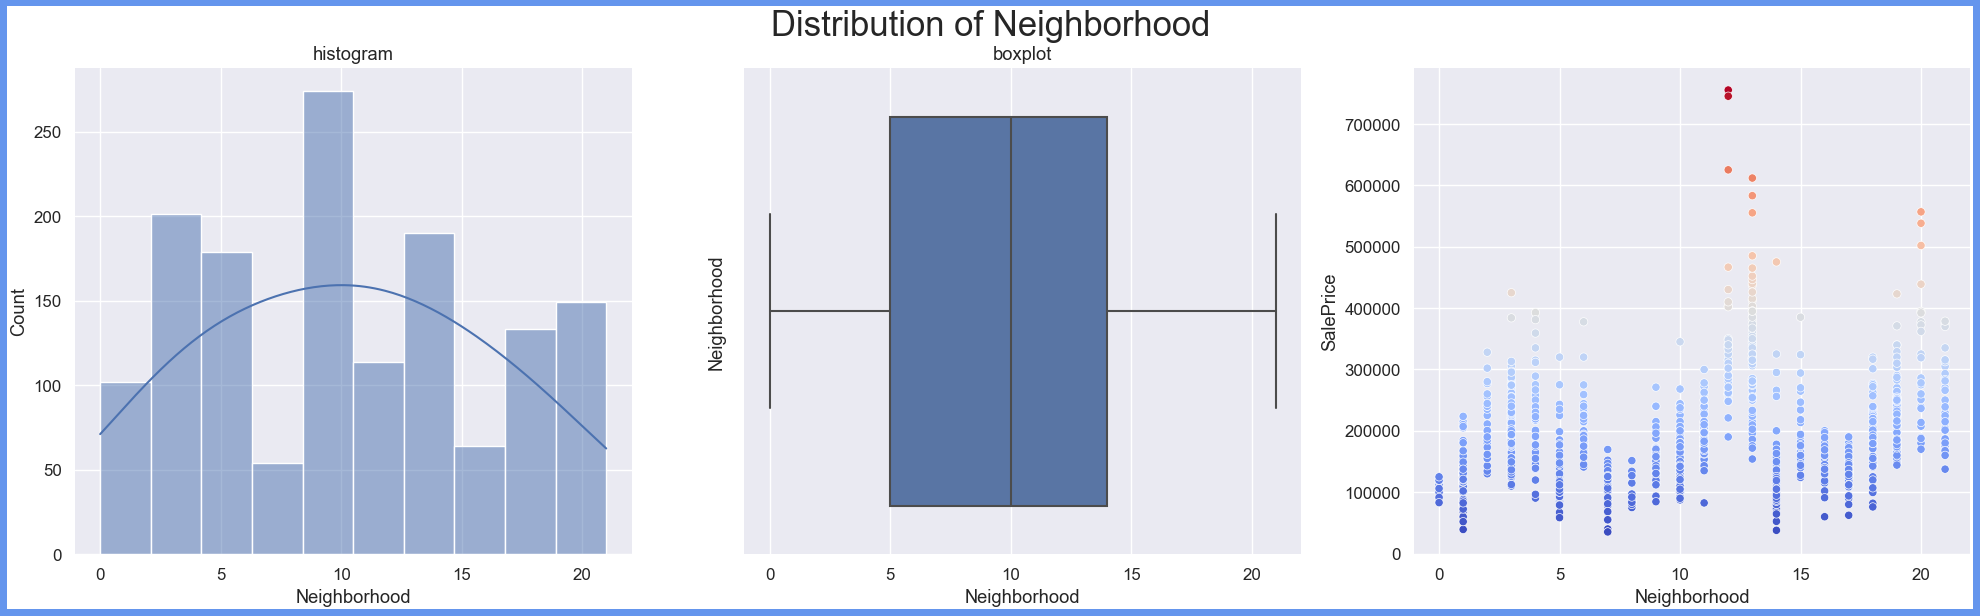

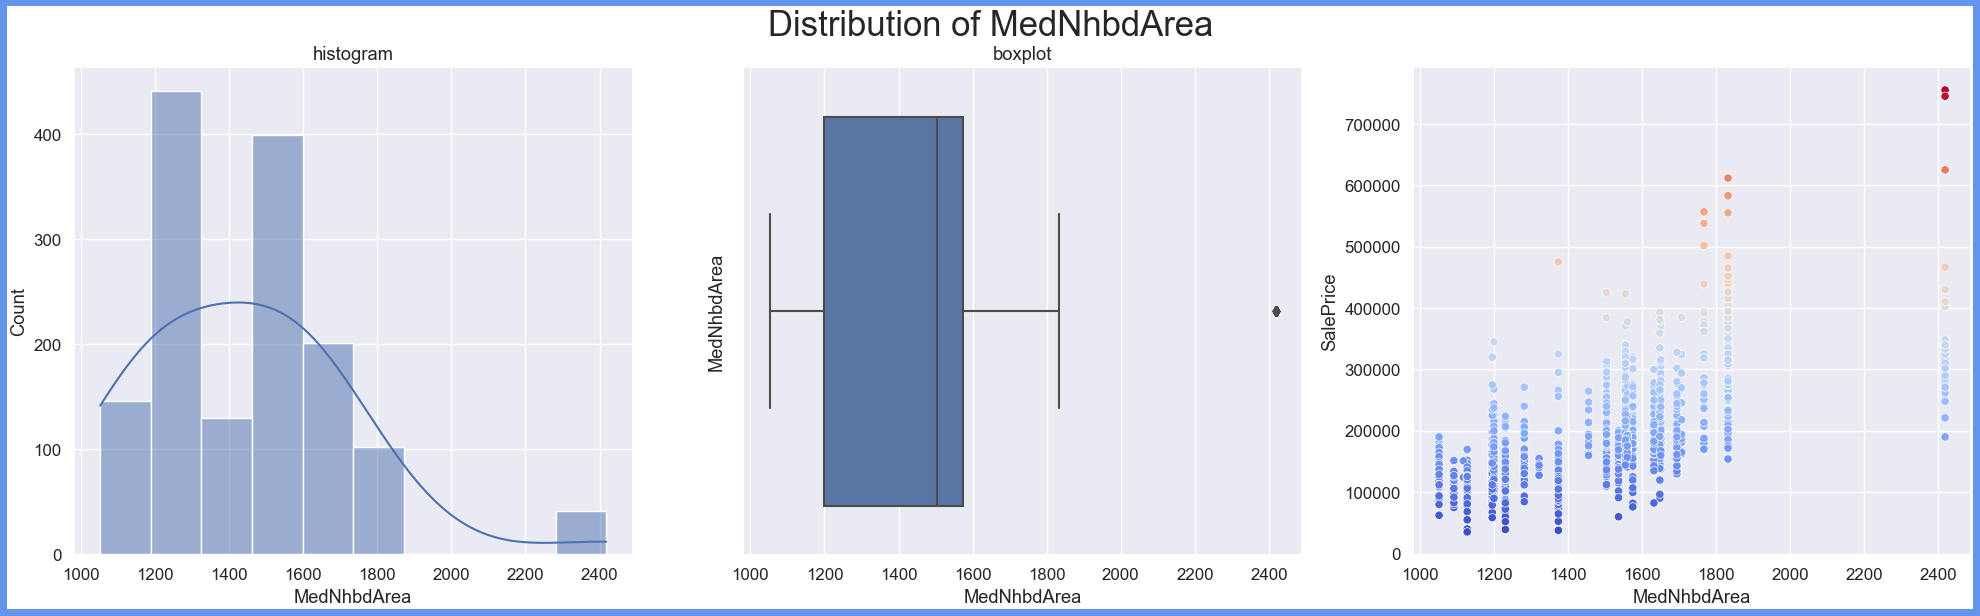

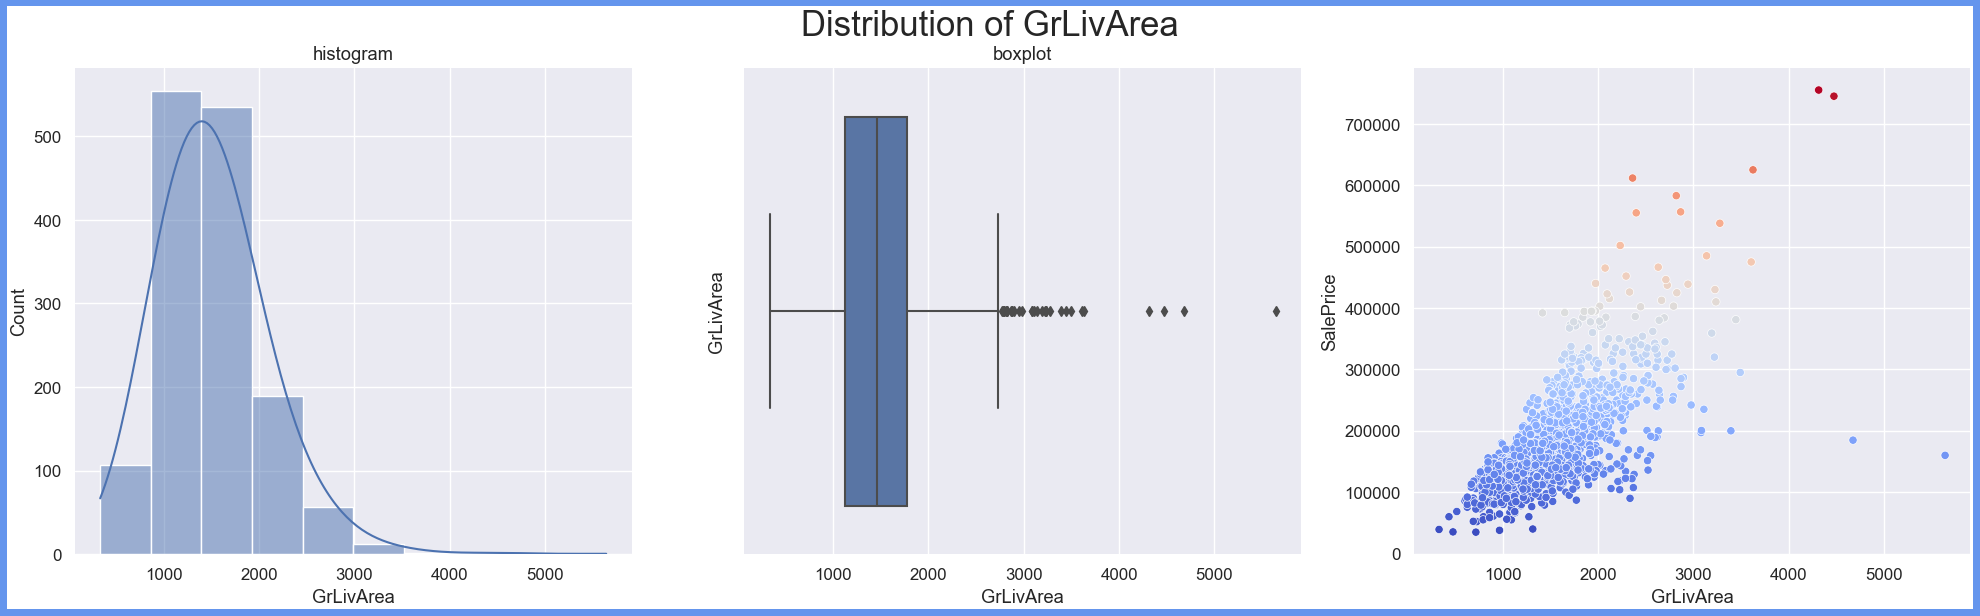

<IPython.core.display.Javascript object>

In [70]:
for feature in top_features:
    univariate_numerical_plot(X, feature)

- The totalSF column is right skewed with some outliers and a median value of ~2200. It also has a positive coorelation with the house price
- The OveralllQual columns is close to a normal distribution with a median value of 6
- The GrLivArea is right skewed with some outliers and has a positve correlation with the s=house price
- There is no clear coorelation between neighborhood and house price

# Feature Selection

In [71]:
# cheking the counts of datatypes in our data
X.dtypes.value_counts()

int64      41
float64    22
int8       21
dtype: int64

<IPython.core.display.Javascript object>

In [72]:
# Categorical columns with low cardinality (number of unique values in a column)
categorical_cols = [
    cname
    for cname in X.select_dtypes(["object", "category", "bool"]).columns
    if X[cname].nunique() < 30
]

# Numerical columns with large correlation with Sales Price
numerical_cols = [
    cname
    for cname in X.select_dtypes("number").columns
    if corr_with_price.MI_Scores[cname] > 0.01
]

# Keep selected columns only
selected_cols = categorical_cols + numerical_cols

# New training data
X = X[selected_cols]

# New test data
X_test = X_test[selected_cols]

<IPython.core.display.Javascript object>

In [73]:
# Out of available feature, following number of features will be used for regression
print(len(categorical_cols), len(numerical_cols))

0 70


<IPython.core.display.Javascript object>

In [74]:
X.dtypes.value_counts()

int64      34
float64    19
int8       17
dtype: int64

<IPython.core.display.Javascript object>

In [75]:
# To see which object columns were selected according to max cardinality condition
# and which numerical columns were selected according to min correlation condition
info = pd.DataFrame(X.dtypes, columns=["Dtype"])
info["Unique"] = X.nunique().values
info["Null"] = X.isnull().sum().values
info.sort_values(["Dtype", "Unique"])

Dtype  Unique  Null
CentralAir              int8       2     0
PavedDrive              int8       3     0
MSZoning                int8       4     0
LandContour             int8       4     0
SaleType                int8       4     0
BldgType                int8       5     0
MasVnrType              int8       5     0
Foundation              int8       5     0
Electrical              int8       5     0
SaleCondition           int8       5     0
Condition1              int8       6     0
HouseStyle              int8       6     0
GarageType              int8       6     0
Exterior1st             int8      11     0
Exterior2nd             int8      11     0
MSSubClass              int8      15     0
Neighborhood            int8      22     0
Remodel                int64       2     0
Garage                 int64       2     0
Bsmt                   int64       2     0
HalfBath               int64       3     0
LotShape               int64       4     0
ExterQual              int64       4     0
FullBath               int64       4     0
KitchenAbvGr           int64       4     0
KitchenQual            int64       4     0
Fireplaces             int64       4     0
GarageFinish           int64       4     0
PorchTypes             int64       4     0
BsmtQual               int64       5     0
BsmtCond               int64       5     0
BsmtExposure           int64       5     0
HeatingQC              int64       5     0
GarageQual             int64       6     0
GarageCond             int64       6     0
BsmtFinType1           int64       7     0
BsmtFinType2           int64       7     0
BedroomAbvGr           int64       8     0
OverallCond            int64       9     0
OverallQual            int64      10     0
TotRmsAbvGrd           int64      12     0
Bldg_Twnhs             int64      25     0
Bldg_Duplex            int64      42     0
AgeRemodel             int64      62     0
Bldg_TwnhsE            int64      87     0
Age                    int64     122     0
2ndFlrSF               int64     417     0
1stFlrSF               int64     753     0
Bldg_1Fam              int64     788     0
GrLivArea              int64     861     0
LotArea                int64    1073     0
BsmtHalfBath         float64       3     0
GarageCars           float64       5     0
TotalBath            float64      10     0
MedNhbdArea          float64      24     0
GarageYrBlt          float64      98     0
LotFrontage          float64     111     0
MasVnrArea           float64     327     0
Garage_Spaciousness  float64     399     0
GarageArea           float64     441     0
GarageArea_Qual      float64     530     0
BsmtFinSF1           float64     637     0
TotalBsmtSF          float64     721     0
BsmtUnfSF            float64     780     0
BsmtArea_Qual        float64     896     0
TotalSF              float64     963     0
Spaciousness         float64     990     0
Liv_Qual             float64    1280     0
BsmtQual_SF          float64    1336     0
LivLotRatio          float64    1423     0

<IPython.core.display.Javascript object>

In [76]:
show_null_values(X, X_test)

Total miising values:
Train Data      0
Test Data     327
dtype: int64


Train Data  Test Data
LotFrontage                   0        227
GarageYrBlt                   0         78
MasVnrArea                    0         15
BsmtFinSF1                    0          1
BsmtUnfSF                     0          1
GarageCars                    0          1
GarageArea                    0          1
GarageArea_Qual               0          1
Garage_Spaciousness           0          1
BsmtQual_SF                   0          1

<IPython.core.display.Javascript object>

- There are null values in the test data
- These null values will be imputed by preprocessor in next section

# Model Creation

### Preprocessing

In [77]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy="median")

# Preprocessing for categorical data
# (not needed as we already have converted 'object' type into 'int8' using Label Encoding)
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OrdinalEncoder(handle_unknown="use_encoded_value")),
    ]
)

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

<IPython.core.display.Javascript object>

In [78]:
# Create object of class XGBRegressor
xgb = XGBRegressor(eval_metric="rmse")

# Bundle preprocessing and modeling code in a pipeline
regressor = Pipeline(steps=[("preprocessor", preprocessor), ("model", xgb)])

<IPython.core.display.Javascript object>

## Visualize Pipeline

In [79]:
from sklearn import set_config

set_config(display="diagram")
regressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotFrontage', 'LotArea',
                                                   'LotShape', 'LandContour',
                                                   'Neighborhood', 'Condition1',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'MasVnrArea',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'B...
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=None,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, ...))])

<IPython.core.display.Javascript object>

## Grid Search & Cross Validation

In [80]:
param_grid = [
    {
        "model__subsample": [0.5],
        "model__n_estimators": [1400],
        "model__max_depth": [5],
        "model__learning_rate": [0.02],
        "model__colsample_bytree": [0.4],
        "model__colsample_bylevel": [0.5],
        "model__reg_alpha": [1],
        "model__reg_lambda": [1],
        "model__min_child_weight": [2],
    }
]
grid_search = GridSearchCV(
    regressor, param_grid, cv=3, verbose=1, scoring="neg_root_mean_squared_error"
)

<IPython.core.display.Javascript object>

## Training and Testing Model

In [81]:
grid_search.fit(X, np.log(y))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'MasVnrType',
                                                                          'MasVnrArea',
                                                                          'ExterQual...
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             param_grid=[{'model__colsample_bylevel': [0.5],
                          'model__colsample_bytree': [0.4],
                          'model__learning_rate': [0.02],
                          'model__max_depth': [5],
                          'model__min_child_weight': [2],
                          'model__n_estimators': [1400],
                          'model__reg_alpha': [1], 'model__reg_lambda': [1],
                          'model__subsample': [0.5]}],
             scoring='neg_root_mean_squared_error', verbose=1)

<IPython.core.display.Javascript object>

In [82]:
# Top 5 hyper-parameter combinations
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.sort_values("rank_test_score")[:5])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.024837      0.316201         0.028317         0.00377   

  param_model__colsample_bylevel param_model__colsample_bytree  \
0                            0.5                           0.4   

  param_model__learning_rate param_model__max_depth  \
0                       0.02                      5   

  param_model__min_child_weight param_model__n_estimators  \
0                             2                      1400   

  param_model__reg_alpha param_model__reg_lambda param_model__subsample  \
0                      1                       1                    0.5   

                                              params  split0_test_score  \
0  {'model__colsample_bylevel': 0.5, 'model__cols...          -0.112716   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0          -0.133119          -0.119263        -0.121699        0.008506   

   rank_test_score  
0                1

<IPython.core.display.Javascript object>

## Best Parameters:

In [83]:
grid_search.best_params_

{'model__colsample_bylevel': 0.5,
 'model__colsample_bytree': 0.4,
 'model__learning_rate': 0.02,
 'model__max_depth': 5,
 'model__min_child_weight': 2,
 'model__n_estimators': 1400,
 'model__reg_alpha': 1,
 'model__reg_lambda': 1,
 'model__subsample': 0.5}

<IPython.core.display.Javascript object>

## Best score in grid search

In [84]:
print("RMSLE on training data:", round(-grid_search.score(X, np.log(y)), 4))
print("RMSLE on validation data:", round(-grid_search.best_score_, 4))

RMSLE on training data: 0.0697
RMSLE on validation data: 0.1217


<IPython.core.display.Javascript object>

### To avoid overfitting:
- Difference in the performance (Root Mean Squared Log Error) of model on training data and validation data should be minimized.

## Generate test predictions

In [85]:
y_preds = np.exp(grid_search.predict(X_test))

<IPython.core.display.Javascript object>

## Saving output to CSV file

In [86]:
output = pd.DataFrame({"Id": X_test.index, "SalePrice": y_preds.round()})
output.to_csv("submission.csv", index=False)

<IPython.core.display.Javascript object>

# The End